In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

/home/quadro/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
checkpoint_file="/media/quadro/NVME/Mehrab/exps/32_quad_long_finetune/epoch_150.pth"
config_file='/media/quadro/NVME/Mehrab/Current_Experiment/finetune_config.py'

img_path="/media/quadro/NVME/Mehrab/datasets/bank_statements/united_commercial_bank.png"

In [3]:
model = init_detector(config_file, checkpoint_file, device=f'cuda:3')

2024-02-25 11:31:13,441 - root - INFO - ModulatedDeformConvPack neck.deconv_layers.0.conv is upgraded to version 2.
2024-02-25 11:31:13,443 - root - INFO - ModulatedDeformConvPack neck.deconv_layers.2.conv is upgraded to version 2.
2024-02-25 11:31:13,445 - root - INFO - ModulatedDeformConvPack neck.deconv_layers.4.conv is upgraded to version 2.


load checkpoint from local path: /media/quadro/NVME/Mehrab/exps/32_quad_long_finetune/epoch_150.pth


In [4]:
pred = inference_detector(model, img_path)

torch.Size([1, 3000, 9]) torch.Size([1, 3000])
before in _get_bboxes_single batch_det_bboxes = torch.Size([1, 3000, 9]), batch_labels = torch.Size([1, 3000])
before in _get_bboxes_single batch_det_bboxes = torch.Size([1, 3000, 9]), batch_labels = torch.Size([1, 3000])
before in _get_bboxes_single batch_det_bboxes = torch.Size([1, 3000, 9]), batch_labels = torch.Size([1, 3000])
before in _get_bboxes_single batch_det_bboxes = torch.Size([1, 3000, 9]), batch_labels = torch.Size([1, 3000])
before in _get_bboxes_single batch_det_bboxes = torch.Size([1, 3000, 9]), batch_labels = torch.Size([1, 3000])
before in _get_bboxes_single batch_det_bboxes = (5400, 5) batch_labels = (3000,)
bbboxes shape  (5400, 5)
labels shape  (3000,)
bbboxes shape  (3000, 5)
labels shape  (3000,)


In [8]:
print(pred)

[array([[394.72665, 825.7217 , 475.36115, 825.68555, 478.34204],
       [477.36655, 581.27716, 535.8613 , 581.1586 , 535.763  ],
       [620.92773, 793.3582 , 723.7896 , 778.1887 , 723.735  ],
       ...,
       [459.51184, 535.27374, 551.08484, 522.24457, 550.81635],
       [135.2182 , 306.21198, 258.47757, 318.4751 , 243.41254],
       [211.5682 , 529.6415 , 346.9695 , 533.20123, 358.87576]],
      dtype=float32)]


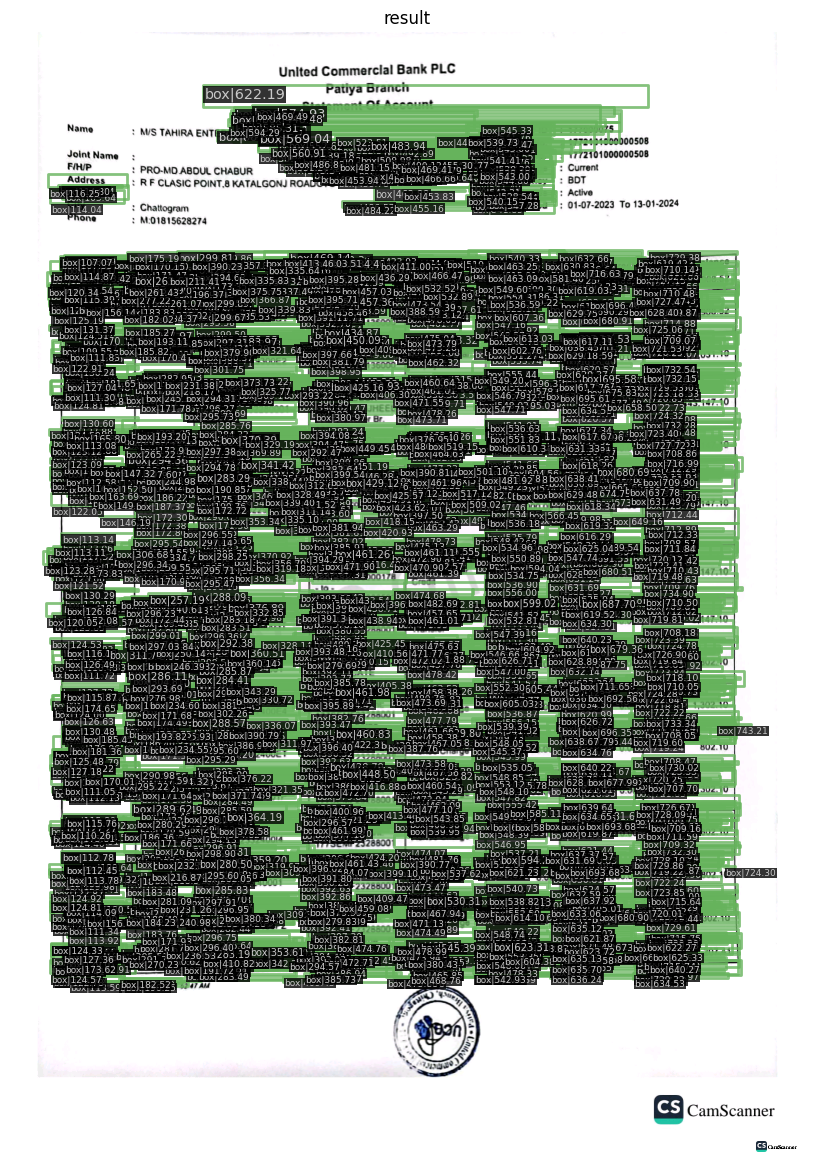

In [6]:
show_result_pyplot(model, img_path, pred, score_thr=0.5)

In [7]:
# Assuming `pred` is the result from your inference function
for class_detections in pred:  # Iterate through each class detections
    for bbox in class_detections:  # Iterate through each detection for the class
        # Extract bounding box coordinates
        x_min, y_min, x_max, y_max, confidence_score = bbox
        print(f"Bounding Box: [{x_min:.2f}, {y_min:.2f}, {x_max:.2f}, {y_max:.2f}], Score: {confidence_score:.2f}")


Bounding Box: [633.67, 440.12, 722.89, 442.26], Score: 725.49
Bounding Box: [636.96, 265.29, 711.81, 267.16], Score: 711.80
Bounding Box: [537.15, 271.61, 632.37, 258.41], Score: 632.39
Bounding Box: [476.82, 438.25, 549.60, 452.02], Score: 534.23
Bounding Box: [464.14, 240.18, 534.27, 244.57], Score: 546.25
Bounding Box: [635.51, 821.75, 721.51, 823.60], Score: 724.27
Bounding Box: [552.84, 239.49, 618.71, 241.08], Score: 618.73
Bounding Box: [624.57, 795.99, 720.08, 782.68], Score: 720.11
Bounding Box: [633.62, 298.03, 727.17, 312.02], Score: 712.17
Bounding Box: [539.06, 916.98, 620.69, 921.68], Score: 632.70
Bounding Box: [548.23, 689.37, 633.16, 691.23], Score: 636.23
Bounding Box: [636.56, 446.99, 710.68, 449.01], Score: 710.51
Bounding Box: [536.93, 832.23, 633.86, 819.10], Score: 633.93
Bounding Box: [548.97, 252.72, 635.43, 266.51], Score: 620.34
Bounding Box: [40.75, 451.20, 110.48, 455.83], Score: 122.29
Bounding Box: [53.30, 619.76, 121.89, 621.21], Score: 124.88
Bounding B

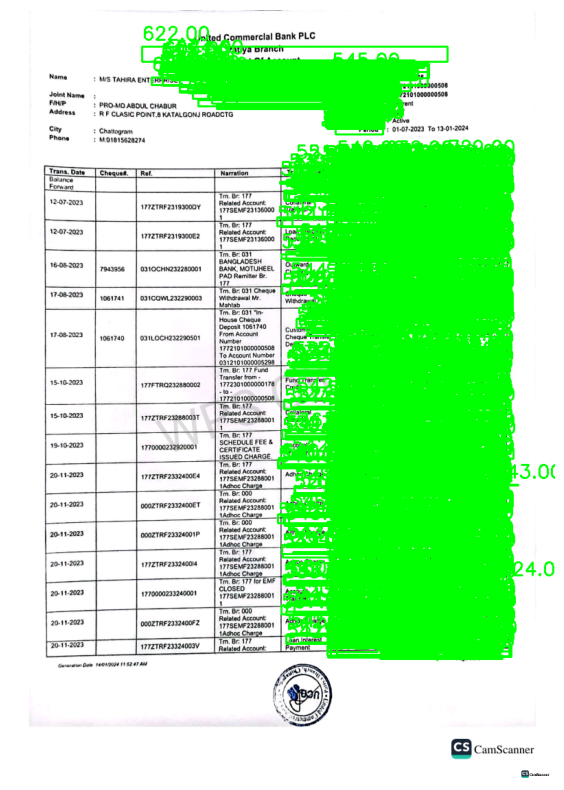

In [9]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(img_path)

# Iterate through each class detections
for class_detections in pred:
    # Iterate through each detection for the class
    for bbox in class_detections:
        # Extract bounding box coordinates
        x_min, y_min, x_max, y_max, confidence_score = bbox.astype(int)

        if confidence_score < 500:
            continue
        # Draw rectangle on the image
        # Note: OpenCV uses BGR color format by default
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        # Optionally, you can add text to display the confidence score
        cv2.putText(img, f"{confidence_score:.2f}", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# If you're using a Jupyter Notebook, display the image inline using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis('off')  # Hide axis
plt.show()
